In [3]:
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
filenames = os.listdir("bricks/dataset")
random.shuffle(filenames)
img_size = 400

In [3]:
def get_pixels(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, [img_size, img_size])
    img = tf.cast(img, tf.float32) / 255.0

    return img

In [5]:
images = []
labels = []
for fn in filenames:
    images.append(get_pixels(f"bricks/dataset/{fn}"))
    labels.append(int(fn.split(" ")[0]))

In [6]:
unique_labels = set(labels)
labels_dict = {}
for idx, i in enumerate(unique_labels):
    labels_dict[i] = idx

In [6]:
for idx, l in enumerate(labels):
    labels[idx] = labels_dict[l]

In [7]:
train_size = int(len(labels) * 0.8)
val_size = train_size+int(len(labels) * 0.17)

In [8]:
train_images = tf.convert_to_tensor(images[:train_size])
train_labels = tf.convert_to_tensor(labels[:train_size])

In [9]:
val_images = tf.convert_to_tensor(images[train_size:val_size])
val_labels = tf.convert_to_tensor(labels[train_size:val_size])

In [10]:
test_images = tf.convert_to_tensor(images[val_size:])
test_labels = tf.convert_to_tensor(labels[val_size:])

In [16]:
model = Sequential(
    [
        Input(shape=(img_size, img_size, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(50, activation='sigmoid')
    ]
)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1000/1000 [==============================] - 1692s 2s/step - loss: 2.2554 - accuracy: 0.3009 - val_loss: 1.5859 - val_accuracy: 0.4787
Epoch 2/10
1000/1000 [==============================] - 1599s 2s/step - loss: 1.5111 - accuracy: 0.4912 - val_loss: 1.2040 - val_accuracy: 0.5859
Epoch 3/10
1000/1000 [==============================] - 1606s 2s/step - loss: 1.1369 - accuracy: 0.6070 - val_loss: 1.0046 - val_accuracy: 0.6454
Epoch 4/10
1000/1000 [==============================] - 1577s 2s/step - loss: 0.8832 - accuracy: 0.6872 - val_loss: 0.9214 - val_accuracy: 0.6725
Epoch 5/10
1000/1000 [==============================] - 1511s 2s/step - loss: 0.7179 - accuracy: 0.7403 - val_loss: 0.8591 - val_accuracy: 0.6974
Epoch 6/10
1000/1000 [==============================] - 1692s 2s/step - loss: 0.5842 - accuracy: 0.7897 - val_loss: 0.8804 - val_accuracy: 0.7078
Epoch 7/10
1000/1000 [==============================] - 1647s 2s/step - loss: 0.4941 - accuracy: 0.8207 - val_loss: 0.8415 -

38/38 [==============================] - 16s 410ms/step


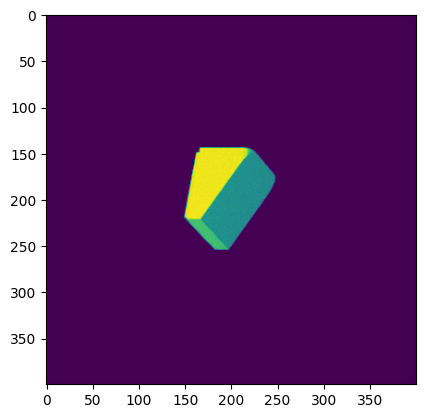

Overall accuracy: 73.83%
Actual: 7 (Lego item No: 54200)
Prediction: 7 (Lego item No: 54200)


In [20]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(test_labels, predicted_labels)
rndm = random.randrange(len(test_labels))
plt.imshow(test_images[rndm])
plt.show()
print(f"Overall accuracy: {round(accuracy*100, 2)}%")
print("Actual:", int(test_labels[rndm]), f"(Lego item No: {list(labels_dict.keys())[int(test_labels[rndm])]})")
print("Prediction:", predicted_labels[rndm], f"(Lego item No: {list(labels_dict.keys())[predicted_labels[rndm]]})")

In [22]:
model.save('parameters.h5')